In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

# Preprocessing and sampling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Deep learning imports
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load breast cancer dataset

breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# Create DataFrame from dataset
df = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

In [ ]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
# Add target labels to DataFrame

df['label'] = breast_cancer_dataset.target

# Data Exploration


In [ ]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
# Print shape of DataFrame
df.shape

(569, 31)

In [ ]:
# Print information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Check for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
# Descriptive statistics of DataFrame
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
 #Count of each class

df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [ ]:
# Mean of features by class

df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
description = df.describe()
print(f'description of the dataset  : {description}')

description of the dataset  :        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000    

In [ ]:
corr=df.corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [ ]:
df.std()

mean radius                  3.524049
mean texture                 4.301036
mean perimeter              24.298981
mean area                  351.914129
mean smoothness              0.014064
mean compactness             0.052813
mean concavity               0.079720
mean concave points          0.038803
mean symmetry                0.027414
mean fractal dimension       0.007060
radius error                 0.277313
texture error                0.551648
perimeter error              2.021855
area error                  45.491006
smoothness error             0.003003
compactness error            0.017908
concavity error              0.030186
concave points error         0.006170
symmetry error               0.008266
fractal dimension error      0.002646
worst radius                 4.833242
worst texture                6.146258
worst perimeter             33.602542
worst area                 569.356993
worst smoothness             0.022832
worst compactness            0.157336
worst concav

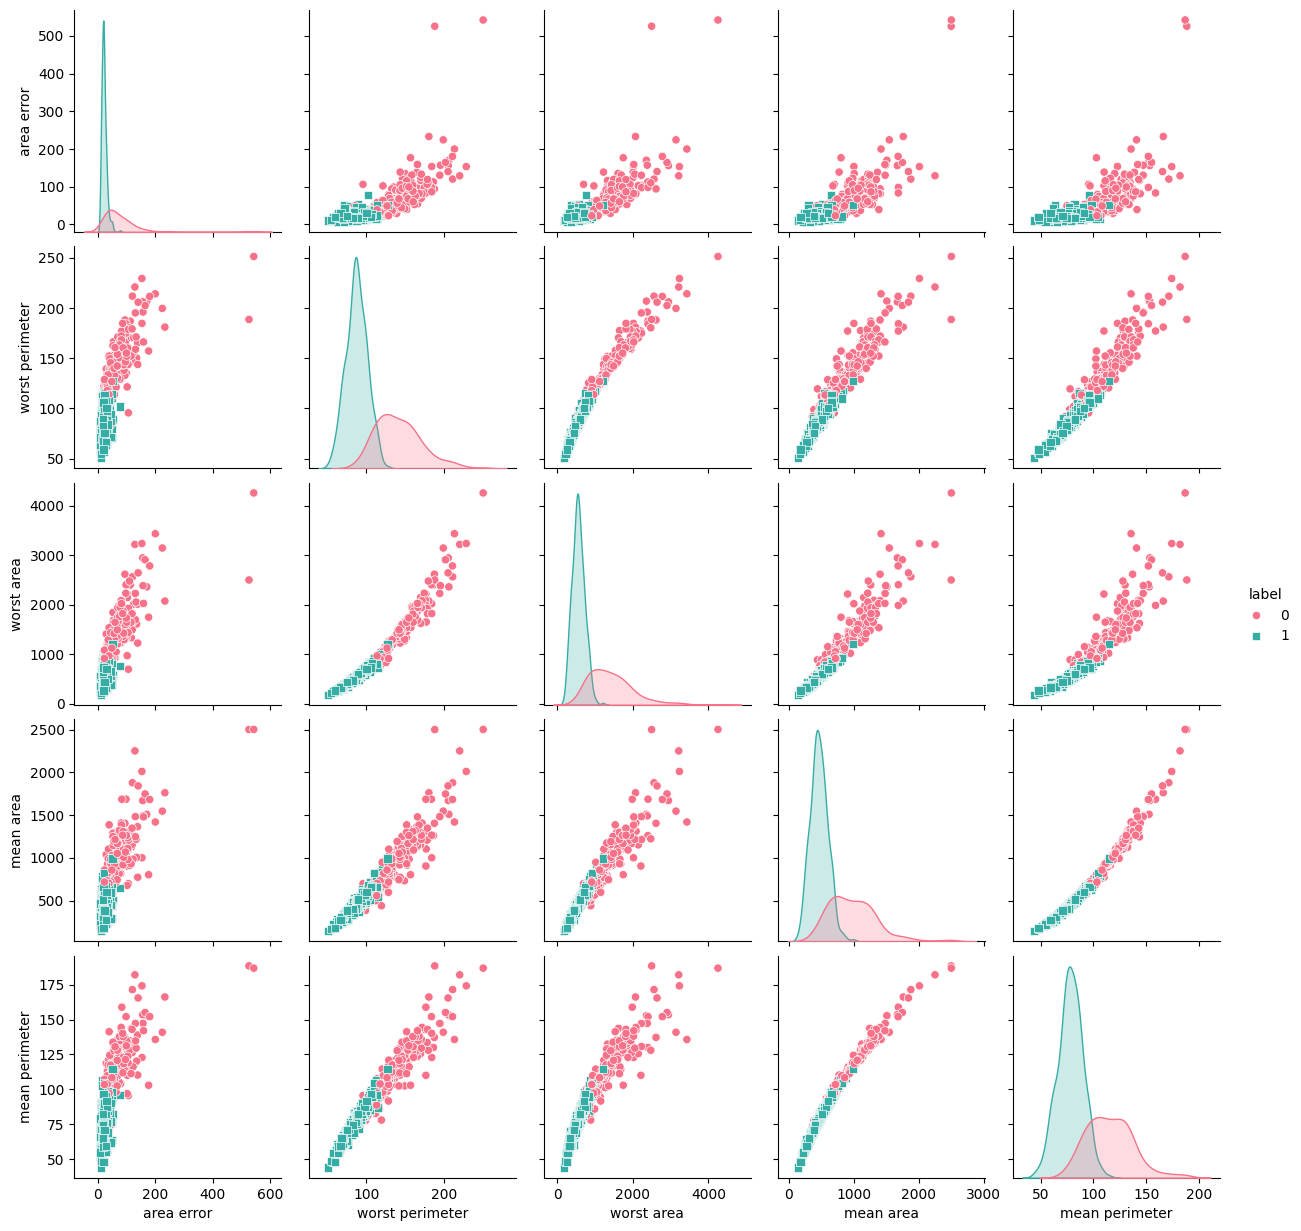

In [ ]:
# Visualizations

selected_features = ['area error', 'worst perimeter', 'worst area', 'mean area',
                    'mean perimeter']

sns.pairplot(df , vars=selected_features, hue='label', markers=['o','s'], palette='husl')
plt.show()

<Axes: xlabel='label', ylabel='count'>

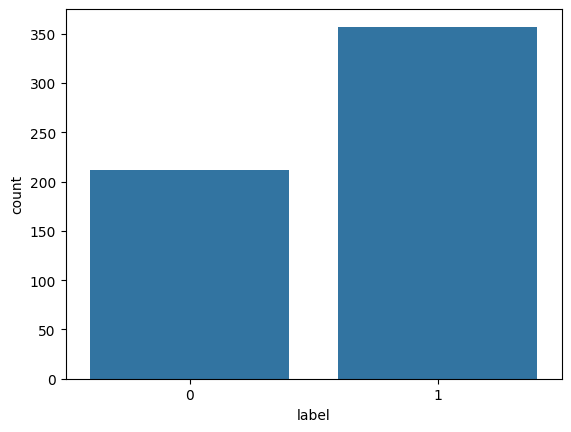

In [ ]:
sns.countplot(x='label', data=df)

<Axes: xlabel='label', ylabel='Density'>

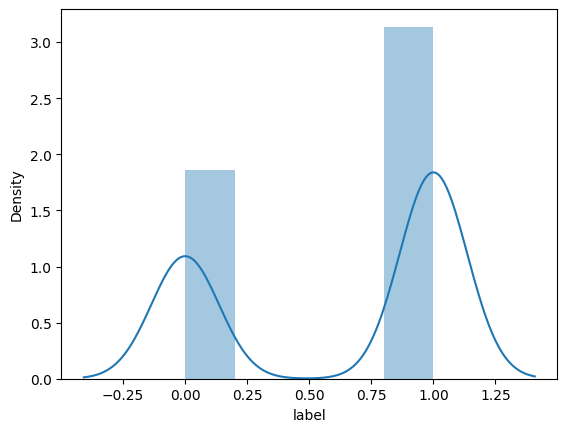

In [ ]:
sns.distplot(df['label'])

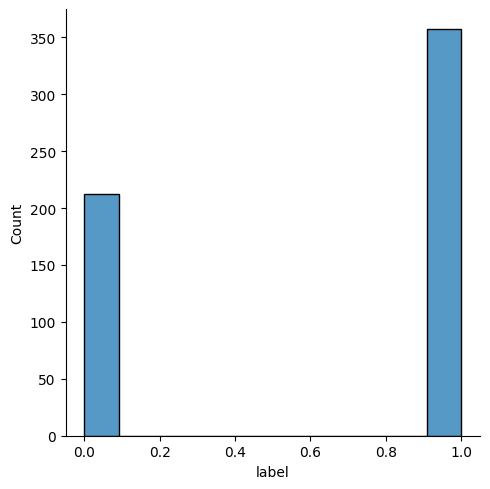

In [ ]:
sns.displot(df['label'])

<Axes: >

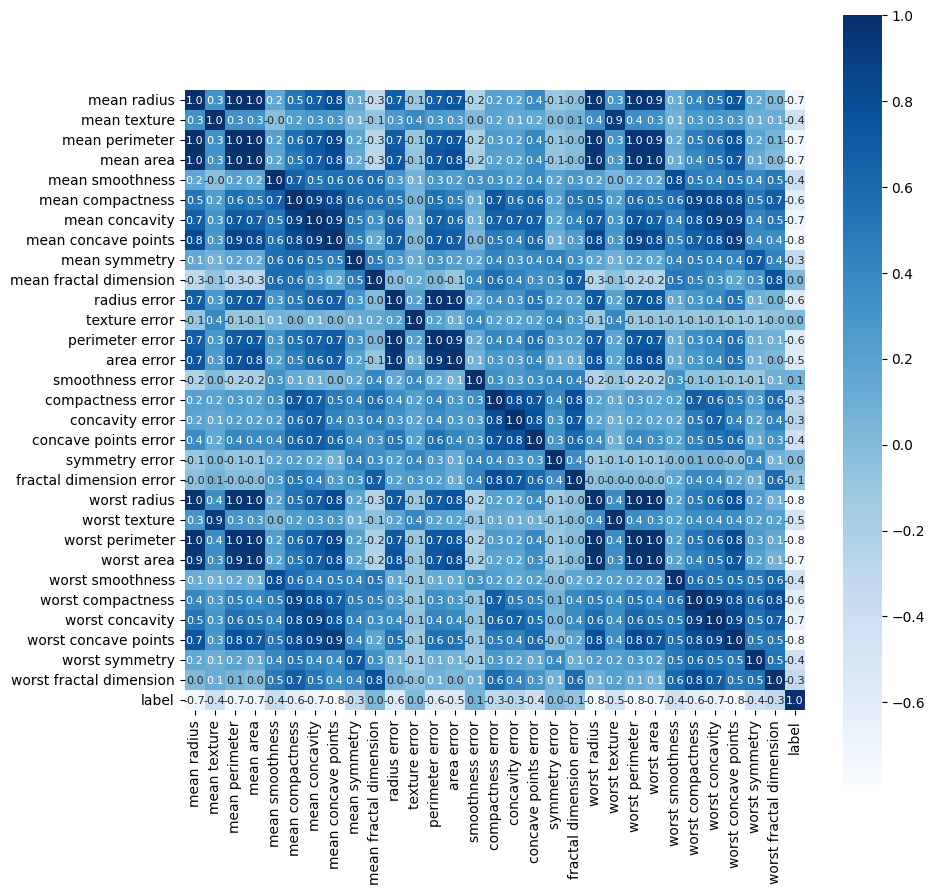

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , cbar=True , square=True , fmt='.1f', annot=True,
           annot_kws={'size':8}, cmap='Blues')

In [ ]:
X = df.drop(columns='label', axis=1)
y = df['label']

In [ ]:
print(X)
print(y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.unique()

array([1, 0])

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

X_train_predict = model.predict(X_train)

training = accuracy_score(y_train, X_train_predict)

print(training)

0.9472527472527472


In [ ]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 200}
best cross-validated accuracy:  0.9626373626373625


In [ ]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 300}
best cross-validated accuracy:  0.9758241758241759


In [ ]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 200}
best cross-validated accuracy:  0.964835164835165


In [ ]:
!pip install  catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = CatBoostClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

Streaming output truncated to the last 5000 lines.
64:	learn: 0.1073431	total: 652ms	remaining: 2.86s
65:	learn: 0.1053920	total: 660ms	remaining: 2.84s
66:	learn: 0.1033458	total: 669ms	remaining: 2.83s
67:	learn: 0.1015881	total: 678ms	remaining: 2.81s
68:	learn: 0.0998884	total: 686ms	remaining: 2.79s
69:	learn: 0.0982979	total: 695ms	remaining: 2.78s
70:	learn: 0.0961961	total: 703ms	remaining: 2.76s
71:	learn: 0.0945720	total: 712ms	remaining: 2.75s
72:	learn: 0.0932190	total: 721ms	remaining: 2.74s
73:	learn: 0.0919831	total: 735ms	remaining: 2.74s
74:	learn: 0.0904647	total: 748ms	remaining: 2.74s
75:	learn: 0.0889394	total: 758ms	remaining: 2.73s
76:	learn: 0.0872150	total: 766ms	remaining: 2.71s
77:	learn: 0.0857620	total: 775ms	remaining: 2.7s
78:	learn: 0.0839499	total: 784ms	remaining: 2.69s
79:	learn: 0.0828029	total: 792ms	remaining: 2.67s
80:	learn: 0.0817871	total: 801ms	remaining: 2.66s
81:	learn: 0.0808444	total: 812ms	remaining: 2.65s
82:	learn: 0.0798067	total: 820m

In [ ]:
model = RandomForestClassifier(n_estimators=200 , random_state=42)
model.fit(X_train,y_train)
y_perd = model.predict(X_test)
accuracy = accuracy_score(y_test,y_perd)
precision = precision_score(y_test,y_perd)
recall = recall_score(y_test,y_perd)
f1 = f1_score(y_test,y_perd)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Accuracy :  0.96%
precision :  0.96%
recall :  0.99%
F1 score :  0.97%


In [ ]:
model = AdaBoostClassifier(n_estimators=300 , random_state=42)
model.fit(X_train,y_train)
y_perd = model.predict(X_test)
accuracy = accuracy_score(y_test,y_perd)
precision = precision_score(y_test,y_perd)
recall = recall_score(y_test,y_perd)
f1 = f1_score(y_test,y_perd)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Accuracy :  0.97%
precision :  0.97%
recall :  0.99%
F1 score :  0.98%


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_perd)
precision = precision_score(y_test,y_perd)
recall = recall_score(y_test,y_perd)
f1 = f1_score(y_test,y_perd)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Accuracy :  0.97%
precision :  0.97%
recall :  0.99%
F1 score :  0.98%


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_perd)
precision = precision_score(y_test,y_perd)
recall = recall_score(y_test,y_perd)
f1 = f1_score(y_test,y_perd)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Learning rate set to 0.0322
0:	learn: 0.6417024	total: 16.3ms	remaining: 3.24s
1:	learn: 0.6003274	total: 28.8ms	remaining: 2.85s
2:	learn: 0.5511783	total: 37.6ms	remaining: 2.47s
3:	learn: 0.5110617	total: 45.9ms	remaining: 2.25s
4:	learn: 0.4789000	total: 54ms	remaining: 2.1s
5:	learn: 0.4452011	total: 63ms	remaining: 2.04s
6:	learn: 0.4143667	total: 72.9ms	remaining: 2.01s
7:	learn: 0.3899454	total: 82.1ms	remaining: 1.97s
8:	learn: 0.3614732	total: 90.6ms	remaining: 1.92s
9:	learn: 0.3385479	total: 101ms	remaining: 1.91s
10:	learn: 0.3188176	total: 111ms	remaining: 1.9s
11:	learn: 0.3025374	total: 119ms	remaining: 1.87s
12:	learn: 0.2862568	total: 129ms	remaining: 1.86s
13:	learn: 0.2707476	total: 138ms	remaining: 1.84s
14:	learn: 0.2555049	total: 149ms	remaining: 1.84s
15:	learn: 0.2419544	total: 164ms	remaining: 1.88s
16:	learn: 0.2299096	total: 178ms	remaining: 1.91s
17:	learn: 0.2189073	total: 194ms	remaining: 1.96s
18:	learn: 0.2077804	total: 207ms	remaining: 1.98s
19:	learn:

In [ ]:
model = SVC(kernel='linear', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_perd)
precision = precision_score(y_test,y_perd)
recall = recall_score(y_test,y_perd)
f1 = f1_score(y_test,y_perd)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')

Accuracy :  0.97%
precision :  0.97%
recall :  0.99%
F1 score :  0.98%


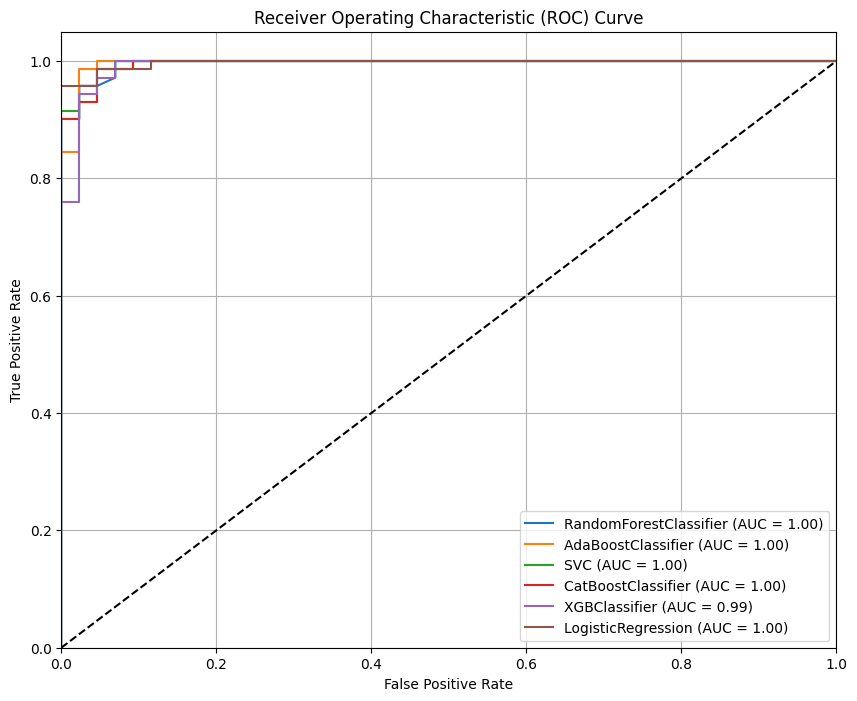

In [ ]:
# Define models for ROC curve plotting

from sklearn.metrics import roc_curve, auc

models = [
    RandomForestClassifier(n_estimators=200, random_state=42),
    AdaBoostClassifier(n_estimators=300, random_state=42),
    SVC(kernel='linear', probability=True, random_state=42),
    CatBoostClassifier(n_estimators=200, random_state=42, verbose=False),
    XGBClassifier(n_estimators=200, random_state=42),
    LogisticRegression()
]
# Plot ROC curve for each model

plt.figure(figsize=(10, 8))
for model in models:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (type(model).__name__, roc_auc))

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
# Load breast cancer dataset
breast_cancer_dataset = load_breast_cancer()
X, y = breast_cancer_dataset.data, breast_cancer_dataset.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Shuffle and split dataset into train and test sets
from numpy.random import default_rng

rng = default_rng(42)
indices = rng.permutation(len(X))
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define advanced neural network architecture
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(128, kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(64, kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with advanced optimizer and metrics
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with callbacks for learning rate scheduling and early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Predict classes
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Epoch 1/100
15/15 [==============================] - 3s 26ms/step - loss: 0.9557 - accuracy: 0.6440 - val_loss: 0.7349 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.8549 - val_loss: 0.6262 - val_accuracy: 0.9035 - lr: 0.0010
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5919 - accuracy: 0.9011 - val_loss: 0.5659 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5759 - accuracy: 0.9143 - val_loss: 0.5262 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4788 - accuracy: 0.9604 - val_loss: 0.4988 - val_accuracy: 0.9298 - lr: 0.0010
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4942 - accuracy: 0.9429 - val_loss: 0.4742 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.

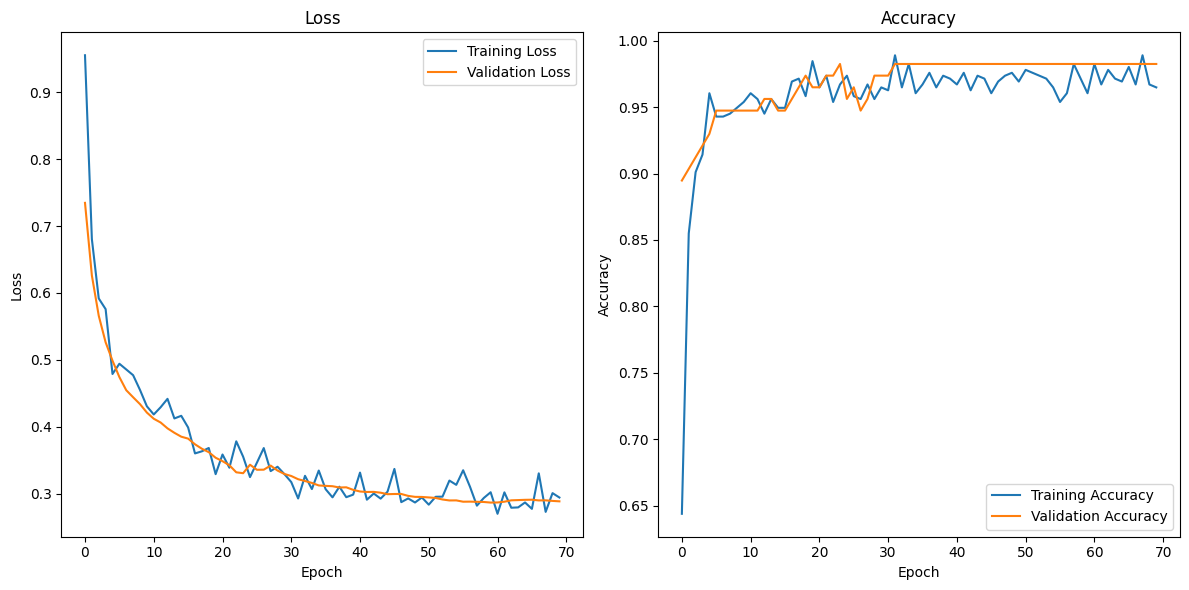

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

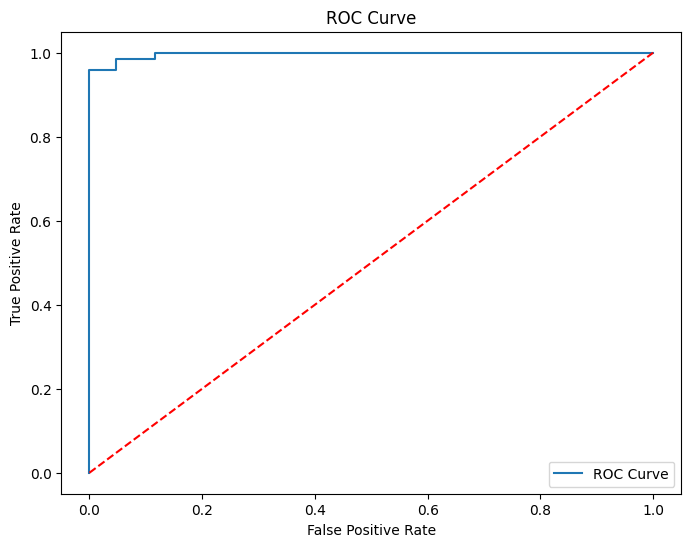

4/4 [==============================] - 0s 3ms/step


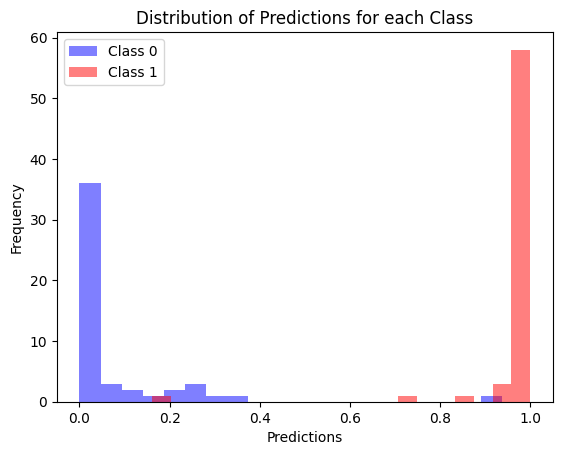

In [ ]:
# Receiver Operating Characteristic (ROC) Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Distribution of Predictions for each Class
predictions = model.predict(X_test)
plt.hist(predictions[y_test == 0], bins=20, color='blue', alpha=0.5, label='Class 0')
plt.hist(predictions[y_test == 1], bins=20, color='red', alpha=0.5, label='Class 1')
plt.title('Distribution of Predictions for each Class')
plt.xlabel('Predictions')
plt.ylabel('Frequency')
plt.legend()
plt.show()